In [1]:
!pip install auto-sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pprint import pprint

In [5]:
df=pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [15]:
X=df.drop(["mpg","horsepower","car name"],axis=1)
y=df["mpg"]
X.shape, y.shape

((398, 6), (398,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((318, 6), (80, 6), (318,), (80,))

In [18]:
import autosklearn.regression
automl = autosklearn.regression.AutoSklearnRegressor(
time_left_for_this_task=5*60,per_run_time_limit=5,tmp_folder='/temp/autosklearn_regression_example_tmp2')
automl.fit(X_train, y_train)

AutoSklearnRegressor(per_run_time_limit=5, time_left_for_this_task=300,
                     tmp_folder='/temp/autosklearn_regression_example_tmp2')

In [19]:
from sklearn.metrics import mean_absolute_error
from autosklearn.metrics import mean_absolute_error as auto_mean_absolute_error

In [20]:
# evaluate best model
y_pred = automl.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.3f" % mae)

MAE: 1.696


In [21]:
# summarize
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 93009592-8b32-11ec-80b1-0242ac1c0002
  Metric: r2
  Best validation score: 0.872678
  Number of target algorithm runs: 63
  Number of successful target algorithm runs: 61
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0



In [22]:
print(automl.leaderboard())

          rank  ensemble_weight                 type      cost  duration
model_id                                                                
27           1             0.02          extra_trees  0.127322  1.524491
5            2             0.14    gradient_boosting  0.136955  1.929039
25           3             0.02           libsvm_svr  0.140865  1.231241
7            4             0.04     gaussian_process  0.145762  4.226014
48           5             0.38  k_nearest_neighbors  0.147395  0.823386
23           6             0.22     gaussian_process  0.156933  3.507779
59           7             0.08          extra_trees  0.177557  2.380062
64           8             0.02                  mlp  0.182248  1.047853
41           9             0.08                  mlp  0.236206  1.249419


In [23]:
pprint(automl.show_models(), indent=4)

{   5: {   'cost': 0.13695471359682454,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f656a9bf6d0>,
           'ensemble_weight': 0.14,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f656a552b10>,
           'model_id': 5,
           'rank': 2,
           'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f656a5520d0>,
           'sklearn_regressor': HistGradientBoostingRegressor(l2_regularization=0.0018018055158809108,
                              learning_rate=0.05048450688348591, max_iter=512,
                              max_leaf_nodes=3, min_samples_leaf=1,
                              n_iter_no_change=19, random_state=1,
                              validation_fraction=0.19819612428903174,
                              warm_start=True)},
    7: {   'cost': 0.14576160399769966,
           

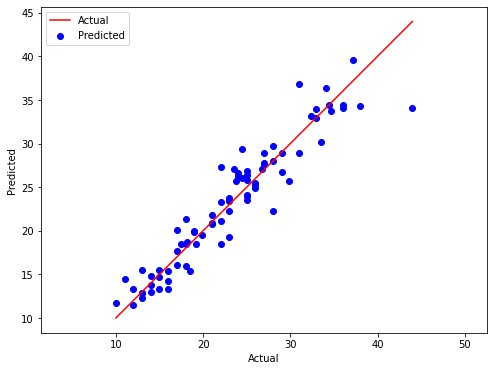

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, c='blue')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend(['Actual', 'Predicted'])
plt.axis('equal')
plt.show()

In [25]:
import pickle
# save the model 
filename = 'final_model.sav' 
pickle.dump(automl, open(filename, 'wb'))

In [26]:
#load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8961482068979871
